<a href="https://colab.research.google.com/github/FilipeSCampos/Analise-de-Dados/blob/main/Trabalho_Web_Scrapping_certo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
from bs4 import BeautifulSoup
import requests
HTMLFileToBeOpened = open("Etherium_Data_24_20.html", "r")
mainpage = HTMLFileToBeOpened.read()
soup = BeautifulSoup(mainpage, 'lxml')


#Duas formas de fazer webscraping uma baixando o html da pagina (Muito mais facil) e outra do jeito comum em request

In [ ]:
print(soup.find('tbody'))


In [224]:
#ocultado pq é grande pra caramba

#Olhando o cod html na pagina da pra ver que os valores estao dentro da <tbody>

In [190]:
# primeira coluna
print(soup.find('tbody').find_all('td')[0].prettify())
# segunda coluna
print(soup.find('tbody').find_all('td')[1].prettify())
for col in range (7):
    print(soup.find('tbody').find_all('td')[col].prettify())

<td style="text-align: start;">
 Apr 28, 2024
</td>

<td style="text-align: start;">
 $3,252.25
</td>

<td style="text-align: start;">
 Apr 28, 2024
</td>

<td style="text-align: start;">
 $3,252.25
</td>

<td style="text-align: start;">
 $3,351.18
</td>

<td style="text-align: end;">
 $3,249.15
</td>

<td style="text-align: end;">
 $3,262.77
</td>

<td style="text-align: end;">
 $11,379,192,678
</td>

<td style="text-align: end;">
 $398,178,669,382
</td>



#Tendo Certeza que ta tudo certo

In [195]:
# vendo as 7 primeiras colunas em 3 dias
for row in range(3):
    for col in range(7):
        print(soup.find('tbody').find_all('td')[row*7+col].text.strip())
    print()

Apr 28, 2024
$3,252.25
$3,351.18
$3,249.15
$3,262.77
$11,379,192,678
$398,178,669,382

Apr 27, 2024
$3,129.73
$3,279.45
$3,071.34
$3,252.17
$11,820,785,577
$396,940,718,035

Apr 26, 2024
$3,156.38
$3,166.19
$3,103.10
$3,130.16
$10,622,333,862
$381,981,442,516



#Transformando em DataFrame

In [192]:
import pandas as pd
from datetime import datetime, timedelta

# Definir o intervalo de datas desejado (três anos atrás até a data atual)
end_date = datetime.now()
start_date = end_date - timedelta(days=365 * 3)

# Inicializa listas para armazenar os dados
dates = []
prices = []

# Itera sobre as linhas correspondentes ao intervalo de datas desejado
rows = soup.find('tbody').find_all('tr')
for row in rows:
    # Extrai a data e o preço das três primeiras colunas
    cols = row.find_all('td')
    date_str = cols[0].text.strip()
    price = cols[1].text.strip()

    # Converte a string de data para objeto datetime
    date = datetime.strptime(date_str, '%b %d, %Y')

    # Verifica se a data está dentro do intervalo desejado
    if start_date <= date <= end_date:
        # Adiciona os dados às listas
        dates.append(date)
        prices.append(price)

# Cria um DataFrame com os dados coletados
df = pd.DataFrame({'Date': dates, 'Price': prices})



In [193]:
df

,Date,Price
0,2024-04-28,"$3,252.25"
1,2024-04-27,"$3,129.73"
2,2024-04-26,"$3,156.38"
3,2024-04-25,"$3,139.62"
4,2024-04-24,"$3,219.96"
...,...,...
1088,2021-05-06,"$3,524.93"
1089,2021-05-05,"$3,240.55"
1090,2021-05-04,"$3,431.13"
1091,2021-05-03,"$2,951.18"


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 1092 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1093 non-null   datetime64[ns]
 1   Price   1093 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 25.6+ KB


#Uma Breve Série Temporal para analise do preço da bitcoin em relação ao tempo


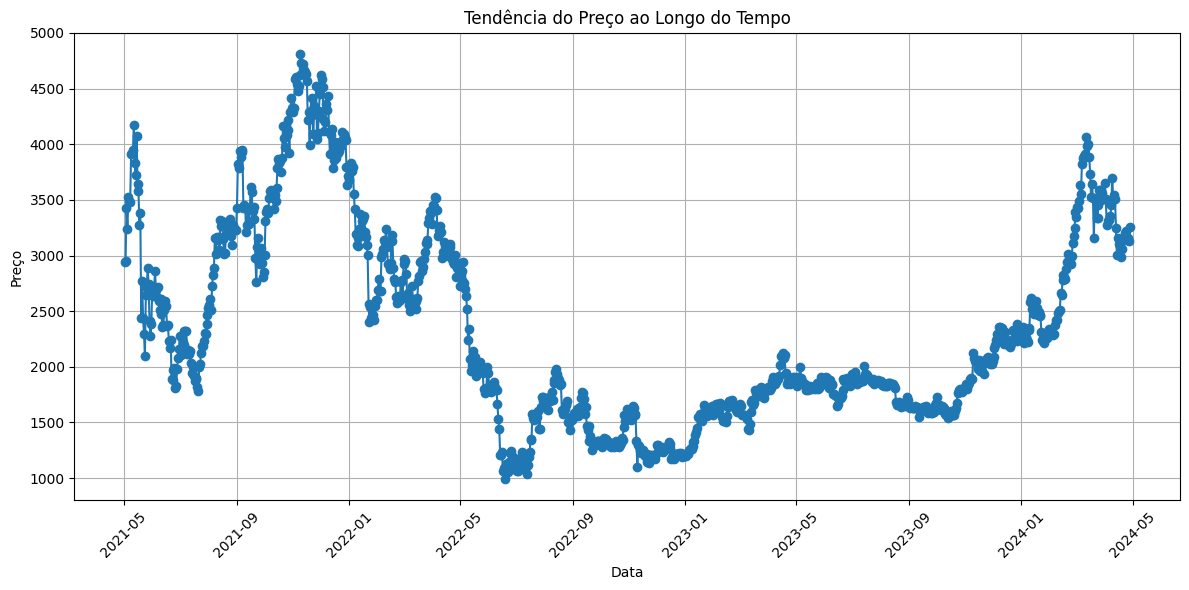

In [199]:
# Remover o símbolo de dólar ($) e quaisquer outros caracteres não numéricos da coluna de preços
df['Price'] = df['Price'].str.replace(r'[^0-9.]+', '', regex=True)

# Converter a coluna de preços para o tipo float
df['Price'] = df['Price'].astype(float)

# Agora podemos plotar o gráfico de linha temporal
import matplotlib.pyplot as plt

# Converter a coluna de data para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordenar o DataFrame pela data (do mais antigo para o mais recente)
df = df.sort_values(by='Date')

# Plotar o gráfico de linha temporal
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-')
plt.title('Tendência do Preço ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Tentativas de conseguir exito por meio de requests

In [200]:
import requests
url = "https://coinmarketcap.com/currencies/ethereum/historical-data/"
response = requests.get(url)
if response.status_code == 200:
    print("A solicitação foi bem-sucedida")
else:
    print("Ocorreu um erro ao fazer a solicitação.")


A solicitação foi bem-sucedida


#Procurando no html da pagina onde ficava o preco, e vasculhando onde cada div table e classe ficava, uma dentro da outra até chegar na tbody

In [201]:
table = soup.find("table", {"class": "cmc-table"})
if table:
    rows = table.find_all("tr")
    # Continue o código para extrair os dados das linhas da tabela
else:
    print("Não foi possível encontrar a tabela.")


In [202]:
# Encontrar a div que contém a tabela
history_div = soup.find("div", class_="history")
if history_div:
    # Dentro da div "history", encontrar a div que contém a tabela
    table_div = history_div.find("div", class_="sc-4033ac70-2 gUDHzc")
    if table_div:
        # Dentro da div da tabela, encontrar a tabela propriamente dita
        table = table_div.find("table")
        if table:
            # Dentro da tabela, encontrar todas as linhas
            rows = table.find_all("tr")
            # Agora você pode continuar a extrair os dados das células das linhas
        else:
            print("Não foi possível encontrar a tabela.")
    else:
        print("Não foi possível encontrar a div da tabela.")
else:
    print("Não foi possível encontrar a div 'history'.")


In [ ]:
print(history_div)

In [225]:
#grande pra caramba

In [204]:
# Encontrar a div "history" dentro do corpo da página
history_div = soup.find("div", class_="history")
if history_div:
    # Dentro da div "history", encontrar a div que contém a tabela
    table_div = history_div.find("div", class_="sc-4033ac70-2")
    if table_div:
        # Dentro da div da tabela, encontrar a tabela propriamente dita
        table = table_div.find("table")
        if table:
            # Dentro da tabela, encontrar todas as linhas
            rows = table.find_all("tr")
            # Agora você pode continuar a extrair os dados das células das linhas
        else:
            print("Não foi possível encontrar a tabela.")
    else:
        print("Não foi possível encontrar a div da tabela.")
else:
    print("Não foi possível encontrar a div 'history' dentro do corpo da página.")


In [ ]:
print(rows)

In [226]:
#grande pra caramba

#Encontrando os dados finalmente

In [206]:
# Dentro da tabela, encontrar todas as linhas
rows = table.find_all("tr")

# Lista para armazenar os dados da tabela
dados_tabela = []

# Iterar sobre as linhas, ignorando o cabeçalho
for row in rows[1:]:
    # Encontrar todas as células (colunas) nesta linha
    cells = row.find_all("td")

    # Extrair o conteúdo de cada célula e adicioná-lo à lista de dados
    if len(cells) >= 2:
        produto = cells[0].text.strip()
        preco = cells[1].text.strip()
        dados_tabela.append((produto, preco))

# Exibir os dados extraídos
print("Dados da tabela:")
for produto, preco in dados_tabela:
    print(f"Produto: {produto}, Preço: {preco}")


Dados da tabela:
Produto: Apr 28, 2024, Preço: $3,252.25
Produto: Apr 27, 2024, Preço: $3,129.73
Produto: Apr 26, 2024, Preço: $3,156.38
Produto: Apr 25, 2024, Preço: $3,139.62
Produto: Apr 24, 2024, Preço: $3,219.96
Produto: Apr 23, 2024, Preço: $3,201.59
Produto: Apr 22, 2024, Preço: $3,147.66
Produto: Apr 21, 2024, Preço: $3,157.57
Produto: Apr 20, 2024, Preço: $3,059.48
Produto: Apr 19, 2024, Preço: $3,065.95
Produto: Apr 18, 2024, Preço: $2,984.71
Produto: Apr 17, 2024, Preço: $3,084.92
Produto: Apr 16, 2024, Preço: $3,101.14
Produto: Apr 15, 2024, Preço: $3,156.83
Produto: Apr 14, 2024, Preço: $3,005.55
Produto: Apr 13, 2024, Preço: $3,242.94
Produto: Apr 12, 2024, Preço: $3,505.33
Produto: Apr 11, 2024, Preço: $3,543.45
Produto: Apr 10, 2024, Preço: $3,505.16
Produto: Apr 09, 2024, Preço: $3,695.34
Produto: Apr 08, 2024, Preço: $3,453.50
Produto: Apr 07, 2024, Preço: $3,354.21
Produto: Apr 06, 2024, Preço: $3,318.86
Produto: Apr 05, 2024, Preço: $3,330.01
Produto: Apr 04, 2024, 

In [220]:
import pandas as pd

# Criar um DataFrame a partir dos dados extraídos
df = pd.DataFrame(dados_tabela, columns=["Data", "Preco"])

# Exibir o DataFrame
print("DataFrame:")
print(df)


DataFrame:
              Data      Preco
0     Apr 28, 2024  $3,252.25
1     Apr 27, 2024  $3,129.73
2     Apr 26, 2024  $3,156.38
3     Apr 25, 2024  $3,139.62
4     Apr 24, 2024  $3,219.96
...            ...        ...
1250  Nov 25, 2020    $603.90
1251  Nov 24, 2020    $608.52
1252  Nov 23, 2020    $558.06
1253  Nov 22, 2020    $549.49
1254  Nov 21, 2020    $509.74

[1255 rows x 2 columns]


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1255 non-null   object
 1   Preco   1255 non-null   object
dtypes: object(2)
memory usage: 19.7+ KB


In [222]:
import pandas as pd

# Supondo que você tenha uma coluna de datas chamada "Data" no DataFrame df
# Convertendo a coluna "Data" para o tipo datetime
df["Data"] = pd.to_datetime(df["Data"])
# Remover o símbolo de dólar ($) e quaisquer outros caracteres não numéricos da coluna de preços
df['Preco'] = df['Preco'].str.replace(r'[^0-9.]+', '', regex=True)

# Converter a coluna de preços para o tipo float
df['Preco'] = df['Preco'].astype(float)

# Exibir o DataFrame atualizado
print("DataFrame com índice de data:")
print(df)


DataFrame com índice de data:
           Data    Preco
0    2024-04-28  3252.25
1    2024-04-27  3129.73
2    2024-04-26  3156.38
3    2024-04-25  3139.62
4    2024-04-24  3219.96
...         ...      ...
1250 2020-11-25   603.90
1251 2020-11-24   608.52
1252 2020-11-23   558.06
1253 2020-11-22   549.49
1254 2020-11-21   509.74

[1255 rows x 2 columns]


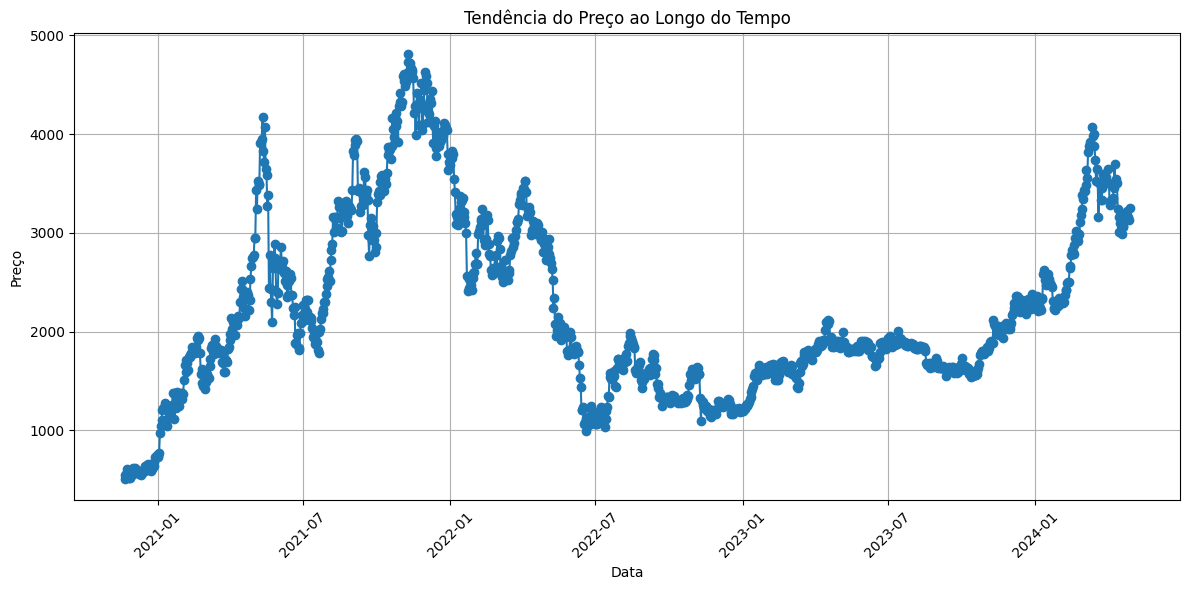

In [223]:
# Agora podemos plotar o gráfico de linha temporal
import matplotlib.pyplot as plt

# Ordenar o DataFrame pela data (do mais antigo para o mais recente)
df = df.sort_values(by='Data')

# Plotar o gráfico de linha temporal
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Preco'], marker='o', linestyle='-')
plt.title('Tendência do Preço ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
